In [1]:
! pip install ultralytics pandas matplotlib opencv-python -q # Instala a biblioteca que permite ler imagens, detectar partículas com YOLO, analisar dados e gerar gráficos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00


In [17]:
!wget 'https://github.com/LeandroOviedo/Aulas-e-materiais-Python/blob/main/ITA_20%20nSDO_14.tif' -O 'ITA_20 nSDO_14.tif'

--2025-09-16 23:04:38--  https://github.com/LeandroOviedo/Aulas-e-materiais-Python/blob/main/ITA_20%20nSDO_14.tif
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ITA_20 nSDO_14.tif’

ITA_20 nSDO_14.tif      [ <=>                ] 179.45K  --.-KB/s    in 0.07s   

2025-09-16 23:04:39 (2.36 MB/s) - ‘ITA_20 nSDO_14.tif’ saved [183758]



Bibliotecas

In [18]:
from ultralytics import YOLO # detecção de objetos
import tifffile as tiff # leitura de imagens em arquivo .tiff
import numpy as np # pacote matemático (operações matemáticas, como média e desvio padrão)
import pandas as pd # construção de dataframes
import matplotlib.pyplot as plt # plotagem de gráficos

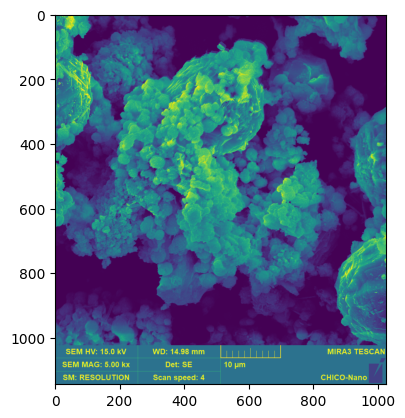


0: 640x576 53 sports balls, 29 cups, 28 bowls, 10 apples, 146 oranges, 1 carrot, 1 chair, 25 mouses, 2 cell phones, 4 scissorss, 1 toothbrush, 233.0ms
Speed: 6.7ms preprocess, 233.0ms inference, 210.2ms postprocess per image at shape (1, 3, 640, 576)


In [24]:
img = tiff.imread('ITA_20 nSDO_14.tif')

# mostrar imagem
plt.imshow(img)
plt.show()

# Se a imagem for monocanal, converta para RGB (YOLO espera 3 canais)
if img.ndim == 2:
    img = np.stack([img]*3, axis=-1)
# Carregue o modelo YOLOv8 treinado para partículas
model = YOLO('yolov8n.pt')

# Realize a inferência
results = model(img) # aplica o modelo treinado em uma nova imagem para detectar e reconhecer objetos presentes nela, gerando previsões.

> ## Bounding boxes

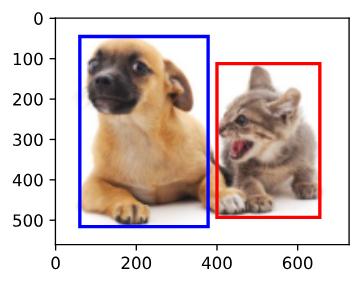

In [25]:
# Extraia as bounding boxes
boxes = results[0].boxes.xyxy.cpu().numpy()  # formato: [x1, y1, x2, y2]

Número de partículas detectadas: 300


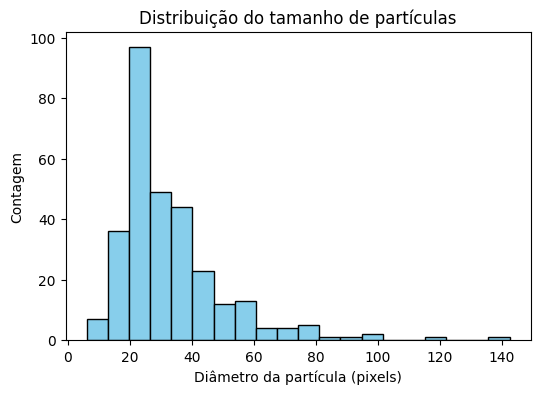

In [26]:
# Extraia as bounding boxes
boxes = results[0].boxes.xyxy.cpu().numpy()  # formato: [x1, y1, x2, y2]
# Conte o número de partículas detectadas
num_particles = len(boxes) # cada box é uma partícula
print(f'Número de partículas detectadas: {num_particles}')

# Calcule o diâmetro (média entre largura e altura da caixa)
sizes = []
for box in boxes:
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    diameter = (width + height) / 2  # ou use sqrt(width*height) para área equivalente
    sizes.append(diameter)

# Crie o DataFrame
df = pd.DataFrame({'particle_diameter_px': sizes})
plt.figure(figsize=(6, 4))
plt.hist(df['particle_diameter_px'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Diâmetro da partícula (pixels)')
plt.ylabel('Contagem')
plt.title('Distribuição do tamanho de partículas')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
df #dataframe (planilha)

,particle_diameter_px
0,18.770386
1,28.036652
2,53.958954
3,14.305725
4,24.393066
...,...
295,26.185730
296,37.520073
297,40.057770
298,20.186356


In [28]:
# Calcula e imprime o valor médio e o desvio padrão do diâmetro das partículas
mean_diameter = df['particle_diameter_px'].mean()
std_diameter = df['particle_diameter_px'].std()  # desvio padrão amostral (ddof=1 por padrão)

print(f'Valor médio do diâmetro das partículas (pixels): {mean_diameter:.2f}')
print(f'Desvio padrão do diâmetro das partículas (pixels): {std_diameter:.2f}')

Valor médio do diâmetro das partículas (pixels): 32.91
Desvio padrão do diâmetro das partículas (pixels): 17.25


--------------------------------------------------------------------------------

Para ler imagens em .JPEG, utiliza-se a biblioteca **import cv2**

Exemplo

```
import cv2

# Leitura da imagem JPEG
imagem = cv2.imread('nome_da_imagem.jpeg')

# Convertendo a imagem para RGB (OpenCV lê em BGR)
image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar com matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

```

$ \ $


--------------------------------------------------------------------------------


